In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset train
train = pd.read_csv('/content/drive/MyDrive/Projet_schoolofdata/train.csv')

In [ ]:
# split dataset en 3
train1 = train[:2000000]
train2 = train[2000000:4000000]
train3 = train[4000000:]

# preprocessing #


In [ ]:
# fonction preprocessing

# TODO: Compute X and y en prenant lookback
def processData(data, past):
    X = []                                   # on cree une matrice X
    for i in range(len(data)-past-1):             # on itere sur les dates 
        X.append(data.iloc[i:i+past].values)           # pas besoin de mettre l'indice des colonnes, on prend tout
    return np.array(X)

lookback = 80                                     # pour regarder past respiration - 1 respi = 80 données

In [ ]:
# PREPROCESSING 1
y1 = train1['pressure'][lookback+1:]
X1 = processData(train1.drop(['id', 'breath_id', 'time_step', 'pressure'], axis=1), lookback)
X1.shape, y1.shape

((1999919, 80, 4), (1999919,))

In [ ]:
# TODO: split (on shuffle pas pour garder information temporelle)
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0, shuffle=False, stratify=None)

In [ ]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((1599935, 80, 4), (399984, 80, 4), (1599935,), (399984,))

In [ ]:
# scale data
# impossible d'utiliser standardscaler ici car 3 dim
X_train1 = (X_train1 - np.mean(X_train1, axis=0))/np.std(X_train1, axis=0)
X_test1 = (X_test1 - np.mean(X_test1, axis=0))/np.std(X_test1, axis=0)

In [ ]:
# export preprocessed data batch 1 en pickle

In [ ]:
import pickle, os

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'X_train1')

In [ ]:
with open(filepath, 'wb') as f:
  pickle.dump(X_train1, f)

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'X_test1')

In [ ]:
with open(filepath, 'wb') as f:
  pickle.dump(X_test1, f)

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'y_train1')

In [ ]:
with open(filepath, 'wb') as f:
  pickle.dump(y_train1, f)

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'y_test1')

In [ ]:
.with open(filepath, 'wb') as f:
  pickle.dump(y_test1, f)

In [ ]:
# PREPROCESSING 2

y2 = train2['pressure'][lookback+1:]
X2 = processData(train2.drop(['id', 'breath_id', 'time_step', 'pressure'], axis=1), lookback)
X2.shape, y2.shape

((1999919, 80, 4), (1999919,))

In [ ]:
# TODO: split (on shuffle pas pour garder information temporelle)
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0, shuffle=False, stratify=None)

In [ ]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((1599935, 80, 4), (399984, 80, 4), (1599935,), (399984,))

In [ ]:
# scale data
# impossible d'utiliser standardscaler ici car 3 dim
X_train2 = (X_train2 - np.mean(X_train2, axis=0))/np.std(X_train2, axis=0)
X_test2 = (X_test2 - np.mean(X_test2, axis=0))/np.std(X_test2, axis=0)

In [ ]:
# export preprocessed data batch 2 en pickle

In [ ]:
import pickle, os

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'X_train2')

In [ ]:
with open(filepath, 'wb') as f:
  pickle.dump(X_train2, f)

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'X_test2')

In [ ]:
with open(filepath, 'wb') as f:
  pickle.dump(X_test2, f)

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'y_train2')

In [ ]:
with open(filepath, 'wb') as f:
  pickle.dump(y_train2, f)

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'y_test2')

In [ ]:
with open(filepath, 'wb') as f:
  pickle.dump(y_test2, f)

In [ ]:
# PREPROCESSING 3

y3 = train3['pressure'][lookback+1:]
X3 = processData(train3.drop(['id', 'breath_id', 'time_step', 'pressure'], axis=1), lookback)
X3.shape, y3.shape

((2035919, 80, 4), (2035919,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=0, shuffle=False, stratify=None)

In [ ]:
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((1628735, 80, 4), (407184, 80, 4), (1628735,), (407184,))

In [ ]:
X_train3 = (X_train3 - np.mean(X_train3, axis=0))/np.std(X_train3, axis=0)
X_test3 = (X_test3 - np.mean(X_test3, axis=0))/np.std(X_test3, axis=0)

In [ ]:
# export preprocessed data batch 3 en pickle

In [3]:
import pickle, os

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'X_train3')

In [ ]:
with open(filepath, 'wb') as f:
  pickle.dump(X_train3, f)

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'X_test3')

In [ ]:
with open(filepath, 'wb') as f:
  pickle.dump(X_test3, f)

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'y_train3')

In [ ]:
with open(filepath, 'wb') as f:
  pickle.dump(y_train3, f)

In [ ]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'y_test3')

In [ ]:
with open(filepath, 'wb') as f:
  pickle.dump(y_test3, f)

In [ ]:
# vérifier type
type(X_train3)

numpy.ndarray

In [ ]:
type(y_train3)

pandas.core.series.Series

# recombiner données preprocessées #

In [ ]:
# recombiner les datasets

In [ ]:
# X_train

In [3]:
!unzip -u '/content/drive/MyDrive/Projet_schoolofdata/xtrain.zip'

Archive:  /content/drive/MyDrive/Projet_schoolofdata/xtrain.zip


In [4]:
import pickle, os

In [5]:
filepath = os.path.join('/content/X_train1')
with open(filepath, 'rb') as f:
    X_train1 = pickle.load(f)

In [6]:
filepath = os.path.join('/content/X_train2')
with open(filepath, 'rb') as f:
    X_train2 = pickle.load(f)

In [7]:
filepath = os.path.join('/content/X_train3')
with open(filepath, 'rb') as f:
    X_train3 = pickle.load(f)

In [8]:
X_train = np.concatenate((X_train1, X_train2, X_train3))

In [ ]:
# X_test

In [6]:
!unzip -u '/content/drive/MyDrive/Projet_schoolofdata/xtest.zip'

Archive:  /content/drive/MyDrive/Projet_schoolofdata/xtest.zip
  inflating: X_test1                 
  inflating: __MACOSX/._X_test1      
  inflating: X_test2                 
  inflating: __MACOSX/._X_test2      
  inflating: X_test3                 
  inflating: __MACOSX/._X_test3      


In [9]:
filepath = os.path.join('/content/X_test1')
with open(filepath, 'rb') as f:
    X_test1 = pickle.load(f)

In [10]:
filepath = os.path.join('/content/X_test2')
with open(filepath, 'rb') as f:
    X_test2 = pickle.load(f)

In [11]:
filepath = os.path.join('/content/X_test3')
with open(filepath, 'rb') as f:
    X_test3 = pickle.load(f)

In [12]:
X_test = np.concatenate((X_test1, X_test2, X_test3))

In [16]:
X_train.shape, X_test.shape

((4828605, 80, 4), (1207152, 80, 4))

In [ ]:
# y_train

In [13]:
filepath = os.path.join('/content/y_train1')
with open(filepath, 'rb') as f:
    y_train1 = pickle.load(f)

In [18]:
filepath = os.path.join('/content/y_train2')
with open(filepath, 'rb') as f:
    y_train2 = pickle.load(f)

In [19]:
filepath = os.path.join('/content/y_train3')
with open(filepath, 'rb') as f:
    y_train3 = pickle.load(f)

In [20]:
# y = pandas series -> utiliser pd.concat()
y_train = pd.concat((y_train1, y_train2, y_train3))

In [ ]:
# y_test

In [14]:
filepath = os.path.join('/content/y_test1')
with open(filepath, 'rb') as f:
    y_test1 = pickle.load(f)

In [15]:
filepath = os.path.join('/content/y_test2')
with open(filepath, 'rb') as f:
    y_test2 = pickle.load(f)

In [16]:
filepath = os.path.join('/content/y_test3')
with open(filepath, 'rb') as f:
    y_test3 = pickle.load(f)

In [17]:
y_test = pd.concat((y_test1, y_test2, y_test3))

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4828605, 80, 4), (1207152, 80, 4), (4828605,), (1207152,))

# LSTM #

## test avec 2 couches cachées

In [ ]:
# ici architecture many to one : plusieurs séquences en entrée et on veut prédire une seule valeur

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

# Define the model

def my_RNN():

    model = Sequential()

    # We add two layers of RNN 
    model.add(LSTM(units=16, return_sequences=True, input_shape=(80, 4), activation='sigmoid'))
    model.add(LSTM(units=16, return_sequences=False, activation='sigmoid'))
    
    # Finally we add a sigmoid
    model.add(Dense(units=1, activation='linear'))

    return model

In [22]:
model = my_RNN()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80, 16)            1344      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 3,473
Trainable params: 3,473
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
model.compile(optimizer='adam',
              loss='mse')

In [25]:
%load_ext tensorboard

In [26]:
import tensorflow as tf
import datetime, os

In [27]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5)]

In [ ]:
# Train the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128, callbacks= tensorboard_callback)

Epoch 1/10
37724/37724 [==============================] - 7091s 188ms/step - loss: 13.0849 - val_loss: 2.3308
Epoch 2/10
37724/37724 [==============================] - 6895s 183ms/step - loss: 2.2430 - val_loss: 2.0846
Epoch 3/10
37724/37724 [==============================] - 6887s 183ms/step - loss: 2.0306 - val_loss: 1.9432
Epoch 4/10
37724/37724 [==============================] - 6866s 182ms/step - loss: 1.8963 - val_loss: 1.8559
Epoch 5/10
37724/37724 [==============================] - 6870s 182ms/step - loss: 1.8047 - val_loss: 1.7330
Epoch 6/10
37724/37724 [==============================] - 6863s 182ms/step - loss: 1.7421 - val_loss: 1.6667
Epoch 7/10
37724/37724 [==============================] - 6874s 182ms/step - loss: 1.6927 - val_loss: 1.7134
Epoch 8/10
37724/37724 [==============================] - 6893s 183ms/step - loss: 1.6544 - val_loss: 1.6115
Epoch 9/10
15617/37724 [===========>..................] - ETA: 1:05:57 - loss: 1.6208

In [15]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'model')

In [16]:
with open(filepath, 'wb') as f:
  pickle.dump(model , f)

INFO:tensorflow:Assets written to: ram://4732c9db-218d-4a31-b287-a0bc71ed0ee0/assets


In [17]:
y_pred1 = model.predict(X_test1)

In [48]:
y_test1.shape

(399984,)

In [49]:
y_pred1.shape

(399984, 1)

In [43]:
filepath = os.path.join('/content/drive/MyDrive/Projet_schoolofdata/', 'y_pred1')

In [44]:
with open(filepath, 'wb') as f:
  pickle.dump(y_pred1 , f)

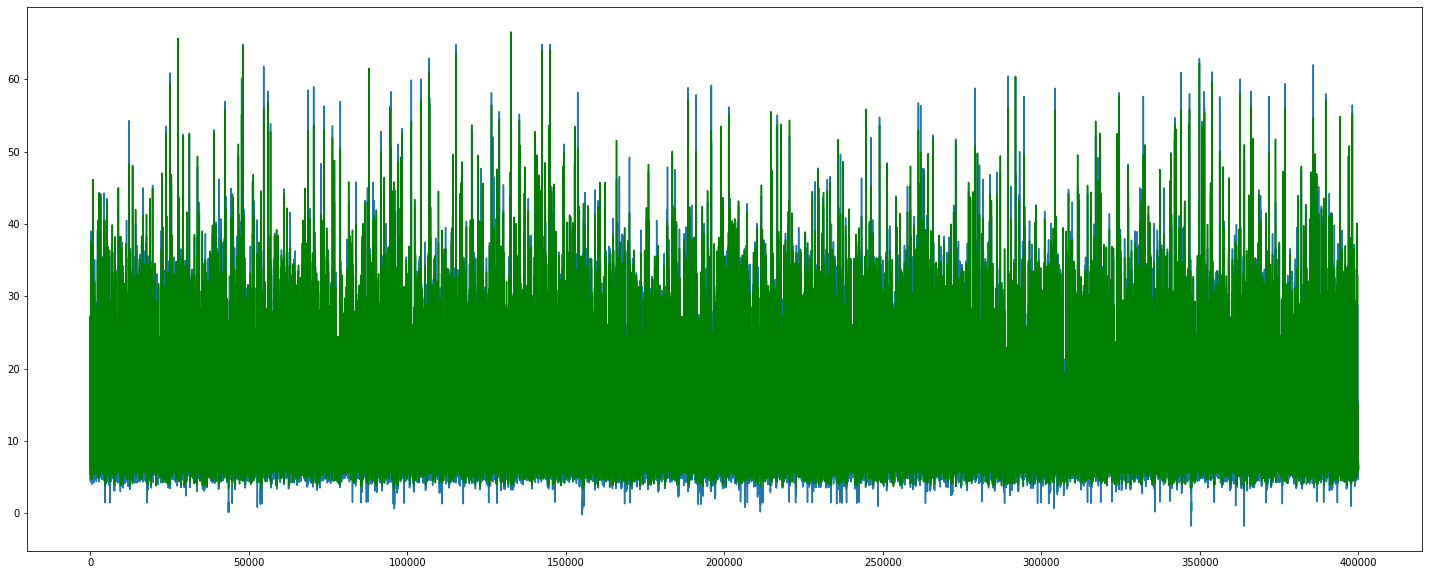

In [18]:
# TODO: Plot the results
plt.figure(figsize=(25,10))
plt.plot(y_test1.values) 
plt.plot(y_pred1.flatten(), color='green')
plt.show()

In [19]:
loss = model.evaluate(X_test1, y_test1, verbose=0)
print('loss is:', loss)

loss is: 1.7294012308120728


In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

1.5657413121980126


In [20]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test1, y_pred1)
print(mae)

0.7866184506313643


In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9759056033883349


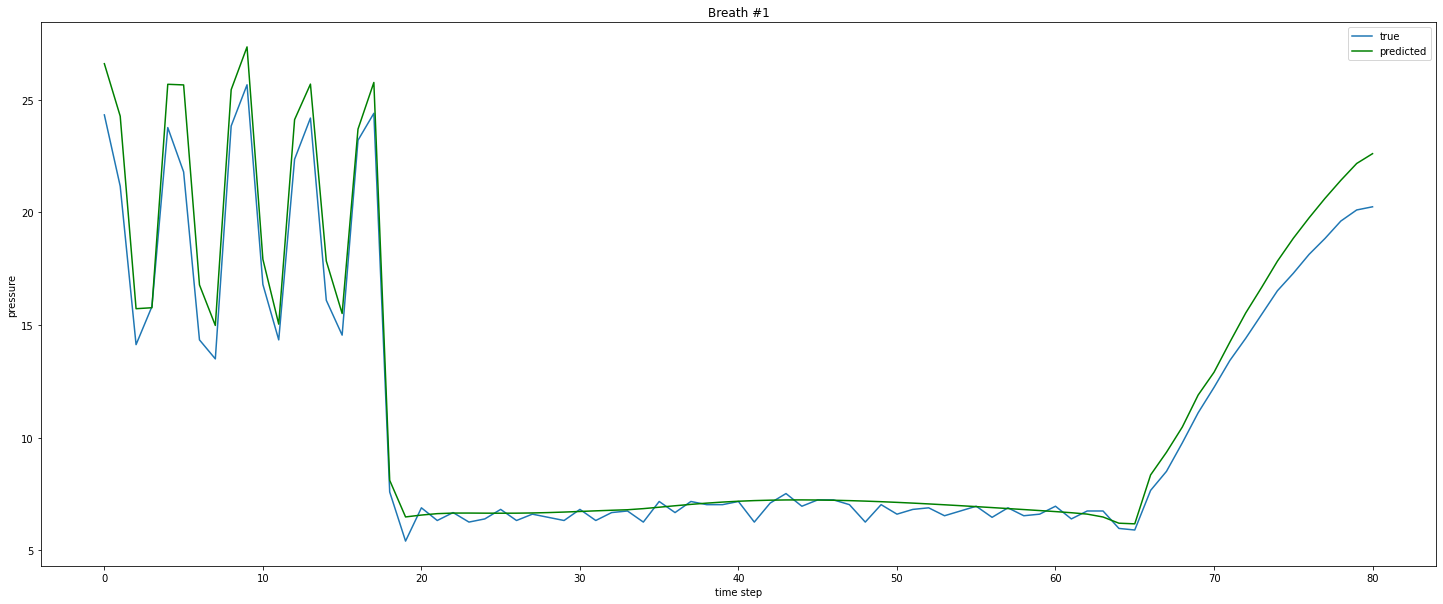

In [37]:
plt.figure(figsize=(25,10))
plt.plot(y_test[:81].values, label='true') 
plt.plot(y_pred[:81].flatten(), color='green', label='predicted')
plt.title('Breath test #1')
plt.xlabel('time step')
plt.ylabel('pressure')
plt.legend()
plt.show()

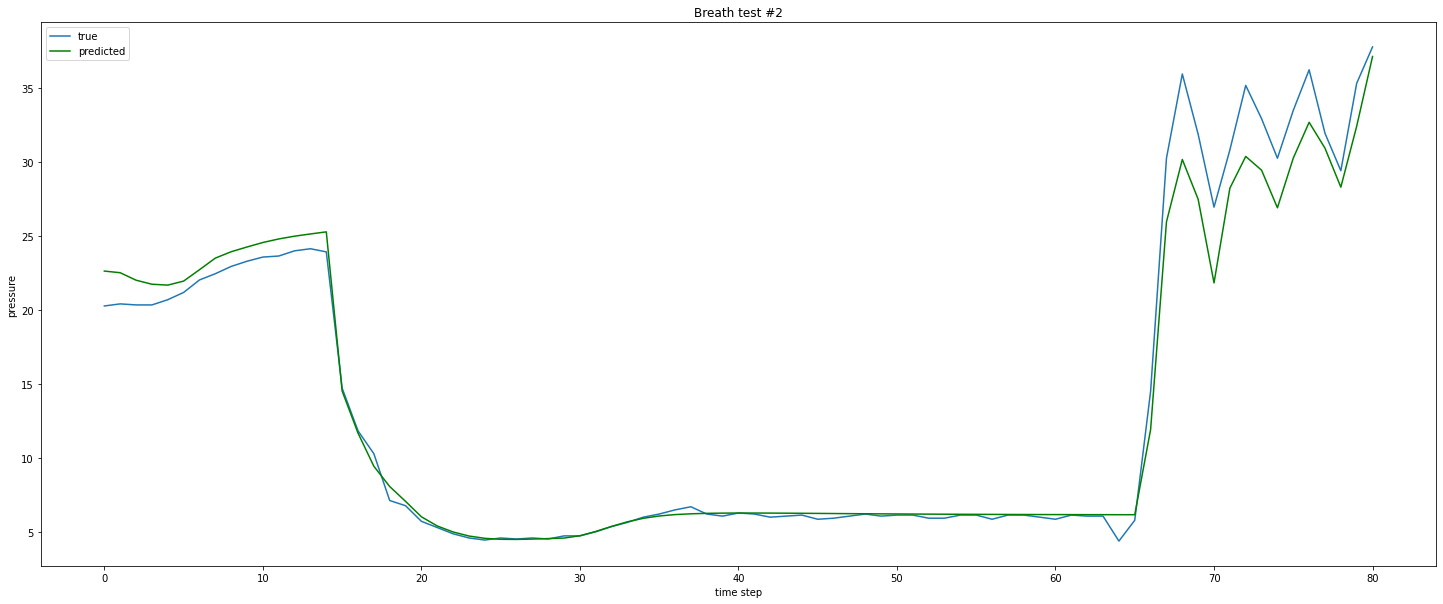

In [38]:
plt.figure(figsize=(25,10))
plt.plot(y_test[80:161].values, label='true') 
plt.plot(y_pred[80:161].flatten(), color='green', label='predicted')
plt.title('Breath test #2')
plt.xlabel('time step')
plt.ylabel('pressure')
plt.legend()
plt.show()

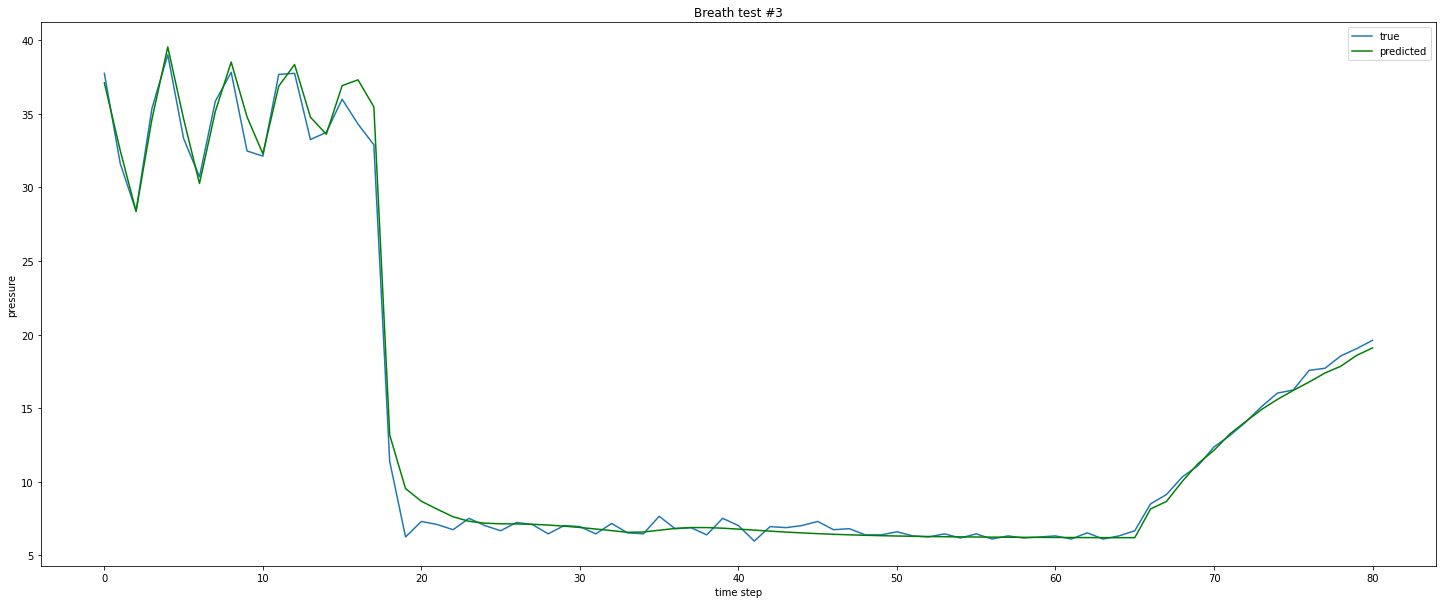

In [39]:
plt.figure(figsize=(25,10))
plt.plot(y_test[160:241].values, label='true') 
plt.plot(y_pred[160:241].flatten(), color='green', label='predicted')
plt.title('Breath test #3')
plt.xlabel('time step')
plt.ylabel('pressure')
plt.legend()
plt.show()

In [24]:
X_test1[0]

array([[ 1.19074974, -0.93809843, -0.04465497, -1.2790214 ],
       [ 1.19075551, -0.93810302, -0.21675765, -1.27902819],
       [ 1.19076127, -0.93810536, -0.3886628 , -1.27902819],
       [ 1.19076703, -0.9381077 , -0.54450599, -1.27902819],
       [ 1.19077279, -0.93811004, -0.54450686, -1.27902819],
       [ 1.19077855, -0.93811238, -0.54450795, -1.27902819],
       [ 1.19078431, -0.93811472, -0.54450912, -1.27902819],
       [ 1.19079008, -0.93811705, -0.54451032, -1.27902819],
       [ 1.19079584, -0.93811939, -0.54451151, -1.27902819],
       [ 1.1908016 , -0.93812173, -0.54451267, -1.27902819],
       [ 1.19080736, -0.93812407, -0.54451375, -1.27902819],
       [ 1.19081312, -0.93812641, -0.54451485, -1.27902819],
       [ 1.19081889, -0.93812875, -0.54451601, -1.27902819],
       [ 1.19082465, -0.93813109, -0.5445171 , -1.27902819],
       [ 1.19083041, -0.93813343, -0.54451817, -1.27902819],
       [ 1.19083617, -0.93813577, -0.54451922, -1.27902819],
       [ 1.19084193, -0.

In [39]:
# créer df avec valeurs test et y test y pred
dfX = pd.DataFrame(X_test1.reshape(399984*80,4))

In [40]:
dfX.head()

,0,1,2,3
0,1.190750,-0.938098,-0.044655,-1.279021
1,1.190756,-0.938103,-0.216758,-1.279028
2,1.190761,-0.938105,-0.388663,-1.279028
3,1.190767,-0.938108,-0.544506,-1.279028
4,1.190773,-0.938110,-0.544507,-1.279028


In [42]:
dfX.shape

(31998720, 4)

In [41]:
dfytest = pd.DataFrame(y_test1)
dfypred = pd.DataFrame(y_pred1)

In [34]:
dfytest.shape

(399984, 1)

In [35]:
dfytest.head()

,pressure
1600016,24.326956
1600017,21.163359
1600018,14.133145
1600019,15.820396
1600020,23.764539


In [37]:
dfytest.reset_index()

,index,pressure
0,1600016,24.326956
1,1600017,21.163359
2,1600018,14.133145
3,1600019,15.820396
4,1600020,23.764539
...,...,...
399979,1999995,6.329607
399980,1999996,6.610815
399981,1999997,6.329607
399982,1999998,6.399909


In [38]:
dfytest['pred'] = dfytest['pressure'].apply(lambda x : model.predict(x))

IndexError: ignored

In [30]:
# vérifier nom des colonnes
df.columns

Index(['pressure', 0], dtype='object')

In [31]:
df.head()

,pressure,0
0,NaN,25.795582
1,NaN,24.549934
2,NaN,16.076334
3,NaN,15.274277
4,NaN,26.317507


In [ ]:
df['mae'] = abs(df['ypred'] - df['ytest'])

In [ ]:
# exporter en csv

In [ ]:
filepath = os.path.join('/content/pressure_test.csv')
df.to_csv(filepath)

## test avec LSTM bidirectionnel

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional

# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(16, return_sequences=True, input_shape=(80, 4), activation='sigmoid')))
model.add(Bidirectional(LSTM(16, activation='sigmoid')))
model.add(Dense(1, activation='linear'))

In [29]:
# besoin de donner input_shape et de build (car bidirectional marche pas pareil)
input_shape=(None, 80, 4)
model.build(input_shape)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 80, 32)           2688      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 8,993
Trainable params: 8,993
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
model.compile(optimizer='adam',
              loss='mse')

In [ ]:
# Train the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
37724/37724 [==============================] - 12823s 340ms/step - loss: 5.6354 - val_loss: 2.2576
Epoch 2/10
37724/37724 [==============================] - 12910s 342ms/step - loss: 2.1275 - val_loss: 1.9394
Epoch 3/10
37724/37724 [==============================] - 12781s 339ms/step - loss: 1.8862 - val_loss: 1.7704
Epoch 4/10
37724/37724 [==============================] - 12942s 343ms/step - loss: 1.7537 - val_loss: 1.6888
Epoch 5/10
37724/37724 [==============================] - 12916s 342ms/step - loss: 1.6679 - val_loss: 1.6387
Epoch 6/10
37724/37724 [==============================] - 12804s 339ms/step - loss: 1.6067 - val_loss: 1.5828
Epoch 7/10
26701/37724 [====================>.........] - ETA: 1:00:36 - loss: 1.5648

## test avec différents paramètres